In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb

In [2]:
diretorio = '/home/matheus/Documentos/Facul/IC/ECG_classification/data/'

In [3]:
# Lista com os códigos que precisamos
codigo = [17366009] 

# Lista dos leads
leads = [0]

In [4]:
data_frame = pd.read_csv('Total.csv')
data_frame

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,Age,Sex,Dx,Rx,Hx,Sx,arquivos,base
0,500,5000,1,NaN,00:00:24,['mV'],['II'],47.0,Female,426177001,Unknown,Unknown,Unknown,JS04442,WFDB_ChapmanShaoxing
1,500,5000,1,NaN,00:00:23,['mV'],['II'],41.0,Female,426177001,Unknown,Unknown,Unknown,JS00992,WFDB_ChapmanShaoxing
2,500,5000,1,NaN,00:00:23,['mV'],['II'],68.0,Female,427084000,Unknown,Unknown,Unknown,JS02338,WFDB_ChapmanShaoxing
3,500,5000,1,NaN,00:00:23,['mV'],['II'],41.0,Female,426177001,Unknown,Unknown,Unknown,JS01381,WFDB_ChapmanShaoxing
4,500,5000,1,NaN,00:00:23,['mV'],['II'],70.0,Male,426177001,Unknown,Unknown,Unknown,JS02487,WFDB_ChapmanShaoxing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158334,257,462600,1,NaN,00:00:15,['mv'],['II'],59.0,Female,251170000,Unknown,Unknown,Unknown,I0020,WFDB_StPetersburg
158335,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,164873001,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg
158336,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,53741008,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg
158337,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,427084000,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg


In [5]:
# Cria tabela com apenas os códigos necessários
df = pd.DataFrame(columns= ['arquivos', 'base', 'Dx'])
for x in range(len(codigo)):
    df = df.append(data_frame.loc[lambda data_frame: data_frame['Dx'] == codigo[x]])


In [6]:
df = df.reset_index()
df.drop(columns= 'index', inplace= True)
df


,arquivos,base,Dx,fs,sig_len,n_sig,base_date,base_time,units,sig_name,Age,Sex,Rx,Hx,Sx
0,JS10144,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],18.0,Female,Unknown,Unknown,Unknown
1,JS10278,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],49.0,Male,Unknown,Unknown,Unknown
2,JS10092,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],27.0,Female,Unknown,Unknown,Unknown
3,JS10183,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],78.0,Female,Unknown,Unknown,Unknown
4,JS10050,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],84.0,Female,Unknown,Unknown,Unknown
5,JS10074,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],15.0,Female,Unknown,Unknown,Unknown
6,JS10210,WFDB_ChapmanShaoxing,17366009,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],87.0,Female,Unknown,Unknown,Unknown


In [7]:
#Cria a tabela dos records
records = pd.DataFrame()

In [8]:
for x in range(len(df)):
    destino = diretorio + df.loc[x]['base'] + '/' + df.loc[x]['arquivos']
    record, fields = wfdb.rdsamp(destino, channels = leads)
    # Colocar o record em uma data_frame Junto com seu código
    aux = pd.DataFrame(record.transpose())
    # Inserir a linha com o nome da arritmia
    aux['arritmia'] = int(df.loc[x]['Dx'])
    # Inserir coluna de leads
    aux['leads'] = leads
    # Inserir a coluna com nome do arquivo
    aux['arquivo'] = df.loc[x]['arquivos']
    records = records.append(aux)

In [9]:
records

,0,1,2,3,4,5,6,7,8,9,...,4993,4994,4995,4996,4997,4998,4999,arritmia,leads,arquivo
0,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.068,-0.078,-0.078,...,0.088,0.102,0.098,0.088,0.078,0.068,0.059,17366009,0,JS10144
0,-0.146,-0.151,-0.171,-0.166,-0.112,-0.102,-0.063,0.020,0.063,0.142,...,0.000,0.010,0.010,0.024,0.024,0.005,-0.015,17366009,0,JS10278
0,-0.166,-0.166,-0.166,-0.166,-0.176,-0.176,-0.176,-0.176,-0.176,-0.176,...,-0.332,-0.332,-0.322,-0.322,-0.322,-0.322,-0.332,17366009,0,JS10092
0,-0.029,-0.029,-0.029,-0.029,-0.024,-0.020,-0.015,-0.010,-0.005,0.000,...,-0.215,-0.215,-0.210,-0.190,-0.200,-0.215,-0.224,17366009,0,JS10183
0,-0.102,-0.093,-0.073,-0.068,-0.068,-0.073,-0.098,-0.102,-0.107,-0.107,...,-0.005,0.010,0.000,-0.015,-0.020,-0.020,-0.020,17366009,0,JS10050
0,0.020,0.020,0.020,0.020,0.010,0.000,-0.010,-0.020,-0.015,-0.010,...,-0.088,-0.088,-0.107,-0.107,-0.083,-0.073,-0.078,17366009,0,JS10074
0,0.024,0.020,0.029,0.029,0.020,0.029,0.024,0.015,0.020,0.015,...,0.039,0.034,0.029,0.034,0.034,0.029,0.024,17366009,0,JS10210


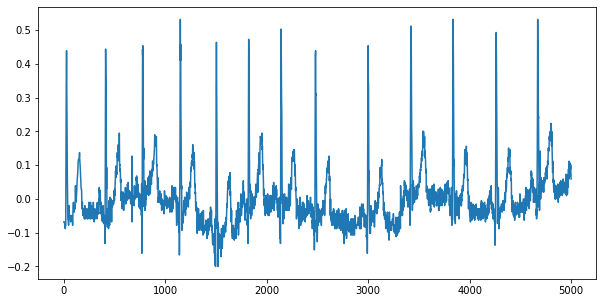

In [11]:
plt.figure(figsize=(10,5))
plt.plot(records.iloc[0][:-3])